# Assignment 2 - Unsupervised Learning 
`

Link to GitHub: https://github.com/alintu/Assignments/MLPP

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
import pandas as pd
from sklearn.datasets import load_linnerud

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

dataset = load_linnerud()
X_full, y_full = dataset.data, dataset.target

In [2]:
print(dataset.feature_names)
print(dataset.target_names)

['Chins', 'Situps', 'Jumps']
['Weight', 'Waist', 'Pulse']


In [3]:
#each feature has different range

X_full

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [4]:
#as there are 3 targets in the dataset, take one of them which will be used in the plot for color mapping

y = y_full[:, 0]

In [5]:
#also taking only 2 features

X = X_full[:, [0,1]]

distributions = [
    ('Original data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler().fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

C:\Users\CON_ASUKHOML\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (20). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\CON_ASUKHOML\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (20). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [6]:
def create_axes(title, figsize=(20, 8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)

In [7]:
def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='D', s=5, lw=5, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 1)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [8]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Chins",
                      x1_label="Situps",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Chins",
                      x1_label="Situps",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

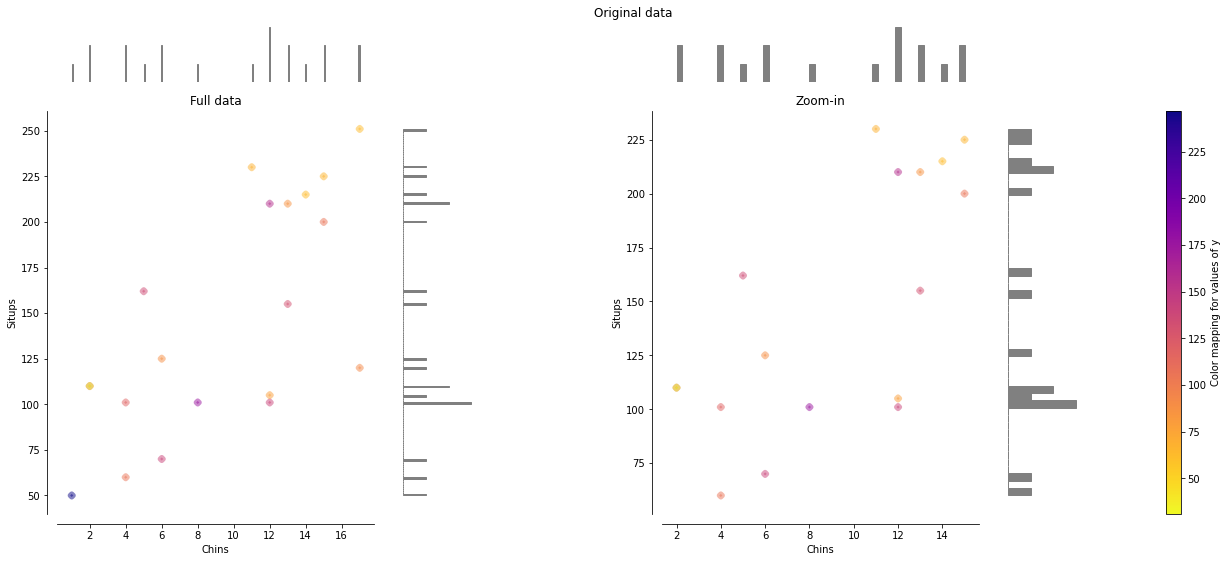

In [9]:
# plot for original data

make_plot(0)

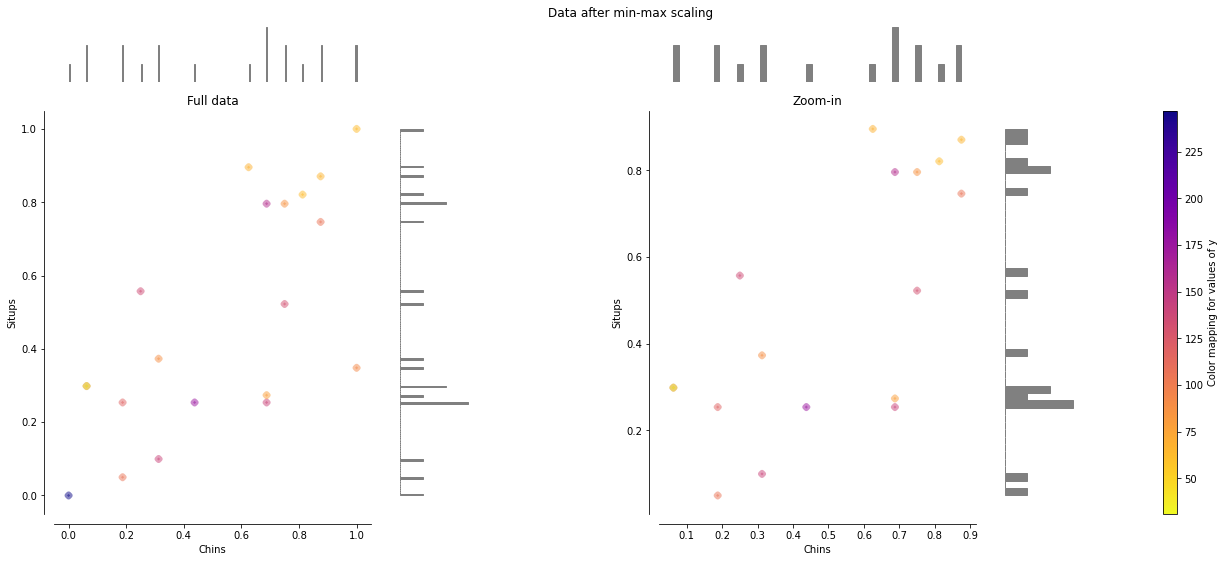

In [10]:
#plot for scaled data with MinMaxScaler

make_plot(2)

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [11]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train', as_frame = True)
data.data

,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,çon,ère,ée,égligent,élangea,érale,ête,íålittin,ñaustin,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#train set

X_train = data['data']
y_train = data['target']

In [13]:
#test set

data_test = fetch_20newsgroups_vectorized(subset='test', as_frame = True)
X_test = data_test['data']
y_test = data_test['target']

In [14]:
#scale

scaler = StandardScaler(copy = False, with_mean = False)
X_train = scaler.fit(X_train).transform(X_train)


In [15]:
X_test = scaler.fit(X_test).transform(X_test)

In [16]:
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier


In [17]:
#create function to calculate test set accuracy of classifier for n-number of components

def cls(components):
    pca = KernelPCA(n_components = components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)
    return (str(components)+ " components, test set accuracy: {:.3f}".format(knn.score(X_test_pca, y_test)))

In [18]:
cls(2)

'2 components, test set accuracy: 0.059'

In [19]:
cls(200)

'200 components, test set accuracy: 0.405'

In [20]:
cls(500)

'500 components, test set accuracy: 0.571'

In [21]:
cls(550)

'550 components, test set accuracy: 0.569'

#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

In [22]:
from matplotlib import rc
font = {'family' : 'monospace', 'size'   : 10}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
from sklearn.cluster import KMeans

#preprocessing with KernelPCA
pca = KernelPCA(n_components = 500)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

# cluster the data into 20 clusters using K-Means
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_train_pca)


<AxesSubplot:>

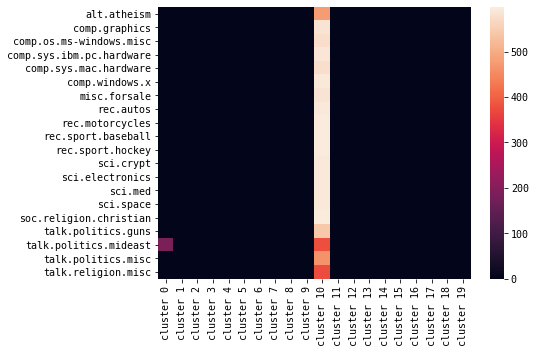

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_train, y_pred)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

In [30]:
print("Confusion matrix:\n{}".format(cm))

Confusion matrix:
[[  2   0   0   0   0   0   0   0   0   0 478   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 584   0   0   0   0   0   0   0
    0   0]
 [  0   1   1   1   1   1   0   1   1   1 578   1   1   1   1   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 590   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 578   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 593   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 585   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 594   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 598   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 597   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 598   0   0   0   0   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 594  

<AxesSubplot:>

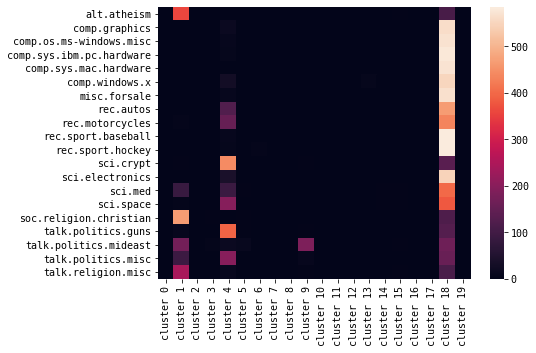

In [31]:
# cluster the data with changed 'init' parameter
kmeans = KMeans(init = 'random', n_clusters=20, random_state=0)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_train_pca)

cm = confusion_matrix(y_train, y_pred)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

In [32]:
print("Confusion matrix:\n{}".format(cm))

Confusion matrix:
[[  0 360   0   2   2   1   0   0   0   1   0   0   0   0   0   3   0   0
  111   0]
 [  0   0   1   0  16   1   0   0   0   0   0   0   0   2   0   0   0   0
  564   0]
 [  1   0   0   1  10   0   0   0   0   0   1   1   2   0   0   0   2   0
  571   2]
 [  0   1   0   0   8   0   0   0   0   0   0   0   0   0   2   0   0   0
  579   0]
 [  0   2   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   1
  573   0]
 [  0   1   0   0  28   0   0   1   0   1   0   0   0   9   2   0   0   0
  551   0]
 [  0   1   1   1  10   0   0   2   0   0   0   0   0   0   0   1   0   0
  569   0]
 [  0   0   1   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0
  468   0]
 [  0   6   1   0 155   0   0   0   0   0   0   0   0   0   1   0   0   0
  435   0]
 [  0   0   0   0  11   2   0   0   0   0   0   0   0   0   0   0   0   0
  584   0]
 [  0   0   0   0   9   1   5   0   0   0   0   0   0   0   0   0   0   0
  585   0]
 [  0   4   0   1 445   1   0   0   0   4   0  